# 1.필요한 모듈 로드및 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [67]:
import pandas as pd

train = pd.read_csv('C:/Users/j2982/jupyter notebook/Artificial sj/AS1/data/train.csv')
test = pd.read_csv('C:/Users/j2982/jupyter notebook/Artificial sj/AS1/data/test.csv')
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 2. 데이터 전처리

불필요한 칼럼 삭제 (감독명, 제목)

In [69]:
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [70]:
train = train.drop(['title'],axis = 1)
test = test.drop(['title'],axis = 1)

In [71]:
train = train.drop(['release_time'],axis = 1)
test = test.drop(['release_time'],axis = 1)

범주형 데이터 인코딩(배급사, 장르, 상영등급)

->각 칼럼이 관객수에 미치는 영향 고려해서 랭크 인코딩 진행

In [72]:
train.distributor.value_counts()

distributor
CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: count, Length: 169, dtype: int64

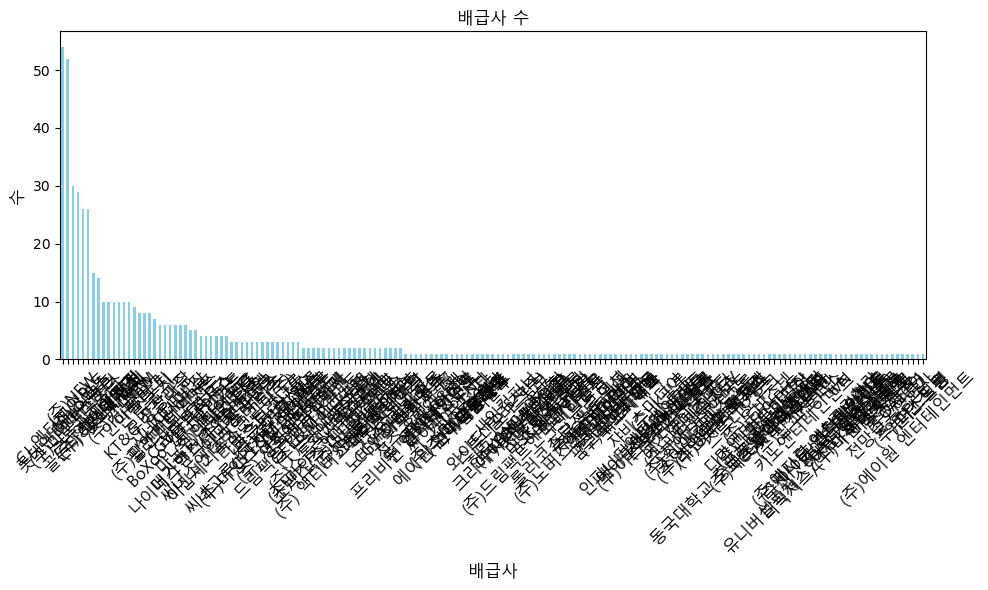

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "C:/Windows/Fonts/malgun.ttf"  
font_prop = fm.FontProperties(fname=font_path, size=12)

# distributor의 값 개수 세기
distributor_counts = train.distributor.value_counts()

# 시각화
plt.figure(figsize=(10, 6))
distributor_counts.plot(kind='bar', color='skyblue')
plt.title('배급사 수', fontproperties=font_prop)
plt.xlabel('배급사', fontproperties=font_prop)
plt.ylabel('수', fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.tight_layout()
plt.show()


상위 8개의 배급사만 남기고 나머지는 기타로 처리
이후 배급사별 평균 관중수 구해서 랭크 인코딩

In [74]:
import pandas as pd

# 1. 배급사별 영화 수 계산
movie_count = train['distributor'].value_counts()

# 2. 상위 8개의 배급사 선택
top_8_distributors = movie_count.nlargest(8).index

# 3. 나머지 배급사를 '기타'로 처리
train['distributor'] = train['distributor'].where(train['distributor'].isin(top_8_distributors), '기타')
test['distributor'] = test['distributor'].where(test['distributor'].isin(top_8_distributors), '기타')

# 4. 배급사별 평균 관객수 계산
average_audience = train.groupby('distributor')['box_off_num'].median()

# 5. 평균 관객수로 랭크 인코딩
ranked_audience = average_audience.rank(ascending=False)
# 6. 결과 확인
print(ranked_audience)


distributor
(주) 케이알씨지    8.0
(주)NEW       3.0
(주)마운틴픽쳐스    7.0
(주)쇼박스       1.0
CJ 엔터테인먼트    2.0
골든타이드픽처스     9.0
기타           5.0
롯데엔터테인먼트     4.0
인디스토리        6.0
Name: box_off_num, dtype: float64


In [75]:
train.groupby('distributor').box_off_num.median().sort_values()

distributor
골든타이드픽처스         599.0
(주) 케이알씨지        629.5
(주)마운틴픽쳐스       1198.0
인디스토리           2612.5
기타              5158.5
롯데엔터테인먼트      612772.0
(주)NEW       1066769.0
CJ 엔터테인먼트    1136188.0
(주)쇼박스       2138560.0
Name: box_off_num, dtype: float64

In [76]:
# 1. 랭크 값을 데이터프레임으로 변환
ranked_audience_df = ranked_audience.reset_index()
ranked_audience_df.columns = ['distributor', 'distributor_rank']

# 2. 데이터 타입 확인 및 변환
train['distributor'] = train['distributor'].astype(str)  # train의 distributor를 문자열로 변환
test['distributor'] = test['distributor'].astype(str)

ranked_audience_df['distributor'] = ranked_audience_df['distributor'].astype(str)  # ranked_audience_df의 distributor도 문자열로 변환

# 3. train 데이터프레임에 랭크 값 추가
train = train.merge(ranked_audience_df, on='distributor', how='left')
test = test.merge(ranked_audience_df, on='distributor', how='left')

# 4. 결과 확인
print(train[['distributor', 'distributor_rank']])
print(test[['distributor', 'distributor_rank']])


    distributor  distributor_rank
0      롯데엔터테인먼트               4.0
1        (주)쇼박스               1.0
2        (주)쇼박스               1.0
3        (주)NEW               3.0
4            기타               5.0
..          ...               ...
595      (주)NEW               3.0
596      (주)쇼박스               1.0
597   (주)마운틴픽쳐스               7.0
598   CJ 엔터테인먼트               2.0
599   CJ 엔터테인먼트               2.0

[600 rows x 2 columns]
    distributor  distributor_rank
0            기타               5.0
1        (주)쇼박스               1.0
2     CJ 엔터테인먼트               2.0
3        (주)쇼박스               1.0
4     CJ 엔터테인먼트               2.0
..          ...               ...
238          기타               5.0
239       인디스토리               6.0
240          기타               5.0
241          기타               5.0
242   (주) 케이알씨지               8.0

[243 rows x 2 columns]


In [77]:
train.genre.value_counts()

genre
드라마       221
다큐멘터리      93
멜로/로맨스     78
코미디        53
공포         42
액션         28
느와르        27
애니메이션      21
미스터리       17
SF         13
뮤지컬         5
서스펜스        2
Name: count, dtype: int64

In [78]:
# 1. 장르별 영화 수 계산
movie_count = train['genre'].value_counts()

# 4. 장르별 평균 관객수 계산
average_audience = train.groupby('genre')['box_off_num'].median()

# 5. 평균 관객수로 랭크 인코딩
ranked_audience = average_audience.rank(ascending=False)

# 6. 결과 확인
print(ranked_audience)

genre
SF         7.0
공포         4.0
느와르        1.0
다큐멘터리     12.0
드라마        8.0
멜로/로맨스    10.0
뮤지컬        9.0
미스터리      11.0
서스펜스       5.0
애니메이션      6.0
액션         2.0
코미디        3.0
Name: box_off_num, dtype: float64


In [79]:
# 1. 랭크 값을 데이터프레임으로 변환
ranked_audience_df = ranked_audience.reset_index()
ranked_audience_df.columns = ['genre', 'genre_rank']

# 2. 데이터 타입 확인 및 변환
train['genre'] = train['genre'].astype(str)  # train의 distributor를 문자열로 변환
test['genre'] = test['genre'].astype(str)
ranked_audience_df['genre'] = ranked_audience_df['genre'].astype(str)  # ranked_audience_df의 distributor도 문자열로 변환

# 3. train 데이터프레임에 랭크 값 추가
train = train.merge(ranked_audience_df, on='genre', how='left')
test = test.merge(ranked_audience_df, on='genre', how='left')
# 4. 결과 확인
print(train[['genre', 'genre_rank']])
print(test[['genre', 'genre_rank']])


    genre  genre_rank
0      액션         2.0
1     느와르         1.0
2      액션         2.0
3     코미디         3.0
4     코미디         3.0
..    ...         ...
595   드라마         8.0
596   드라마         8.0
597    공포         4.0
598   느와르         1.0
599    액션         2.0

[600 rows x 2 columns]
      genre  genre_rank
0       느와르         1.0
1    멜로/로맨스        10.0
2       드라마         8.0
3        액션         2.0
4        공포         4.0
..      ...         ...
238     드라마         8.0
239   다큐멘터리        12.0
240     느와르         1.0
241     드라마         8.0
242  멜로/로맨스        10.0

[243 rows x 2 columns]


In [80]:
train.groupby('genre').box_off_num.median().sort_values()

genre
다큐멘터리        3044.0
미스터리         3199.0
멜로/로맨스       3653.0
뮤지컬          4778.0
드라마          7173.0
SF           9323.0
애니메이션       23802.0
서스펜스        82611.0
공포         179810.0
코미디        210775.0
액션        1147846.5
느와르       1646142.0
Name: box_off_num, dtype: float64

In [81]:
train.screening_rat.value_counts()

screening_rat
청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: count, dtype: int64

In [82]:
# 1. 상영등급별 영화 수 계산
movie_count = train['screening_rat'].value_counts()

# 2. 상영등급별 평균 관객수 계산
average_audience = train.groupby('screening_rat')['box_off_num'].median()

# 3. 상영등급으로 랭크 인코딩
ranked_audience = average_audience.rank(ascending=False)

# 4. 결과 확인
print(ranked_audience)

screening_rat
12세 관람가     2.0
15세 관람가     1.0
전체 관람가      3.0
청소년 관람불가    4.0
Name: box_off_num, dtype: float64


In [83]:
train.groupby('screening_rat').box_off_num.median().sort_values()

screening_rat
청소년 관람불가      3008.5
전체 관람가        8325.0
12세 관람가      19323.0
15세 관람가     242381.0
Name: box_off_num, dtype: float64

In [84]:
# 1. 랭크 값을 데이터프레임으로 변환
ranked_audience_df = ranked_audience.reset_index()
ranked_audience_df.columns = ['screening_rat', 'screening_rat_rank']

# 2. 데이터 타입 확인 및 변환
train['screening_rat'] = train['screening_rat'].astype(str)  # train의 distributor를 문자열로 변환
test['screening_rat'] = test['screening_rat'].astype(str)
ranked_audience_df['screening_rat'] = ranked_audience_df['screening_rat'].astype(str)  # ranked_audience_df의 distributor도 문자열로 변환

# 3. train 데이터프레임에 랭크 값 추가
train = train.merge(ranked_audience_df, on='screening_rat', how='left')
test = test.merge(ranked_audience_df, on='screening_rat', how='left')

# 4. 결과 확인
print(train[['screening_rat', 'screening_rat_rank']])
print(test[['screening_rat', 'screening_rat_rank']])

    screening_rat  screening_rat_rank
0        청소년 관람불가                 4.0
1        청소년 관람불가                 4.0
2         15세 관람가                 1.0
3          전체 관람가                 3.0
4         15세 관람가                 1.0
..            ...                 ...
595      청소년 관람불가                 4.0
596       15세 관람가                 1.0
597      청소년 관람불가                 4.0
598       15세 관람가                 1.0
599       15세 관람가                 1.0

[600 rows x 2 columns]
    screening_rat  screening_rat_rank
0        청소년 관람불가                 4.0
1         12세 관람가                 2.0
2         12세 관람가                 2.0
3         15세 관람가                 1.0
4         15세 관람가                 1.0
..            ...                 ...
238       15세 관람가                 1.0
239       12세 관람가                 2.0
240      청소년 관람불가                 4.0
241      청소년 관람불가                 4.0
242      청소년 관람불가                 4.0

[243 rows x 2 columns]


인코딩된 범주형 칼럼 삭제

In [85]:
train = train.drop(['distributor'],axis = 1)
test = test.drop(['distributor'],axis = 1)
train = train.drop(['genre'],axis = 1)
test = test.drop(['genre'],axis = 1)
train = train.drop(['screening_rat'],axis = 1)
test = test.drop(['screening_rat'],axis = 1)
test

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_rank,genre_rank,screening_rat_rank
0,125,3.005290e+05,2,304,3,5.0,1.0,4.0
1,113,3.427002e+05,4,275,3,1.0,10.0,2.0
2,115,4.206611e+06,3,419,7,2.0,8.0,2.0
3,116,6.913420e+05,2,408,2,1.0,2.0,1.0
4,110,3.173800e+04,1,380,1,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...
238,78,2.590000e+03,1,4,4,5.0,8.0,1.0
239,86,NaN,0,18,2,6.0,12.0,2.0
240,107,NaN,0,224,4,5.0,1.0,4.0
241,102,5.069900e+04,1,68,7,5.0,8.0,4.0


In [86]:
train['dir_prev_bfnum'] = train['dir_prev_bfnum'].fillna(0)
test['dir_prev_bfnum'] = test['dir_prev_bfnum'].fillna(0)
train

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,distributor_rank,genre_rank,screening_rat_rank
0,96,0.00,0,91,2,23398,4.0,2.0,4.0
1,130,1161602.50,2,387,3,7072501,1.0,1.0,4.0
2,123,220775.25,4,343,4,6959083,1.0,2.0,1.0
3,101,23894.00,2,20,6,217866,3.0,3.0,3.0
4,108,1.00,1,251,2,483387,5.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
595,111,3833.00,1,510,7,1475091,3.0,8.0,4.0
596,127,496061.00,1,286,6,1716438,1.0,8.0,1.0
597,99,0.00,0,123,4,2475,7.0,4.0,4.0
598,102,0.00,0,431,4,2192525,2.0,1.0,1.0


In [87]:
import seaborn as sns

heatmap_data = train[['time','dir_prev_bfnum','dir_prev_num', 'num_staff','num_actor','distributor_rank','genre_rank','screening_rat_rank','box_off_num']]
correlation_matrix = heatmap_data.corr()

# box_off_num과 다른 변수 간의 상관관계 추출
box_off_correlation = correlation_matrix['box_off_num'].drop('box_off_num')  # box_off_num과의 상관관계만 추출하고 자기 자신은 제외

# 결과 출력
print(box_off_correlation)


time                  0.441452
dir_prev_bfnum        0.293791
dir_prev_num          0.259674
num_staff             0.544265
num_actor             0.111179
distributor_rank     -0.435482
genre_rank           -0.264428
screening_rat_rank   -0.217651
Name: box_off_num, dtype: float64


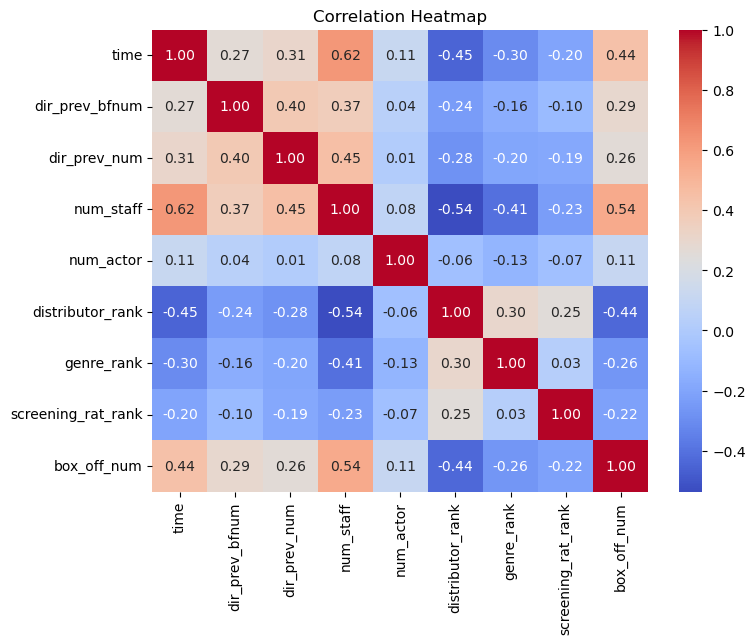

In [88]:
# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [89]:
test

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,distributor_rank,genre_rank,screening_rat_rank
0,125,3.005290e+05,2,304,3,5.0,1.0,4.0
1,113,3.427002e+05,4,275,3,1.0,10.0,2.0
2,115,4.206611e+06,3,419,7,2.0,8.0,2.0
3,116,6.913420e+05,2,408,2,1.0,2.0,1.0
4,110,3.173800e+04,1,380,1,2.0,4.0,1.0
...,...,...,...,...,...,...,...,...
238,78,2.590000e+03,1,4,4,5.0,8.0,1.0
239,86,0.000000e+00,0,18,2,6.0,12.0,2.0
240,107,0.000000e+00,0,224,4,5.0,1.0,4.0
241,102,5.069900e+04,1,68,7,5.0,8.0,4.0


In [90]:
train, val= train_test_split(train, test_size=0.2, random_state=42)

# 2.모델 생성

xgboost모델, lightboost모델 사용

-> 최종모델 light boost

In [91]:
X_train=train.drop(['box_off_num'],axis= 1)
y_train =train['box_off_num']
X_val=val.drop(['box_off_num'], axis=1)
y_val =val['box_off_num']

In [108]:
dists = {
    'xgboostregressor__n_estimators' : [230,240,250,260,270,280],
    'xgboostregressor__max_depth' : [5,6,7],
    'xgboostregressor__gamma' : [0, 1, 2],
    'xgboostregressor__eta' : [0.01, 0.02, 0.03, 0.04, 0.05],
    'xgboostregressor__subsample' : [0.7,0.75, 0.8],
    'xgboostregressor__mean_child_weight' : [0.9, 1, 1.1],
    'xgboostregressor__importance_type' : ['gain'],
    'xgboostregressor__reg_lambda' : [0.9, 1, 1.1],
}
model = XGBRegressor()
regressor1 = RandomizedSearchCV(
    estimator=model,
    param_distributions=dists, # 파라미터 입력
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    verbose=1,     # 진행상황
    random_state = 100)
regressor1.fit(X_train, y_train)
print("최적 하이퍼파라미터:", regressor1.best_params_)
print("최고 검증 점수:", regressor1.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적 하이퍼파라미터: {'xgboostregressor__subsample': 0.7, 'xgboostregressor__reg_lambda': 1.1, 'xgboostregressor__n_estimators': 250, 'xgboostregressor__mean_child_weight': 1.1, 'xgboostregressor__max_depth': 6, 'xgboostregressor__importance_type': 'gain', 'xgboostregressor__gamma': 2, 'xgboostregressor__eta': 0.04}
최고 검증 점수: 0.20782509644291397


In [112]:
best_model = regressor1.best_estimator_
predictions_xgb = best_model.predict(X_val)

mse = mean_squared_error(y_val, predictions_xgb)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1912443925584.92


In [103]:
prediction = best_model.predict(X_test)

In [104]:
import lightgbm as lgb

model = lgb.LGBMRegressor()

param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'boosting_type': ['gbdt', 'dart']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, RANDOM_STATE=100)

# Grid Search 실행
grid_search.fit(X_train, y_train)

print("최적 하이퍼파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 8
[LightGBM] [Info] Start training from score 723519.229167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [111]:
best_model = grid_search.best_estimator_
predictions_light = best_model.predict(X_val)

mse = mean_squared_error(y_val, predictions_light)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1453939978016.81


In [114]:
submission = pd.read_csv('C:/Users/j2982/jupyter notebook/Artificial sj/AS1/data/submission.csv')
submission.head(2)

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0


In [116]:
predictions = best_model.predict(test)

In [117]:
submission['box_off_num'] = predictions
submission.head(2)

,title,box_off_num
0,용서는 없다,1862658.5
1,아빠가 여자를 좋아해,2344353.5


In [118]:
submission.to_csv('submission.csv', index=False, encoding='utf-8-sig')
